**Problem Identified**

Since the beginning of the modern age, electricity has been the primary energy source for powering properties, buildings, factories, and other technologies. Producing the right amount of energy to satisfy everyone's needs has become an issue, especially in South Africa, where there is a growth in the electricity demand each year as new businesses and factories emerge. We want to understand which variables impact the amount of electricity generated in South Africa to plan for future years to come as south Africa experience a growth in the electricity demand.

In [ ]:
import pandas as pd

**Upload Data**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving south_africa_datasets.csv to south_africa_datasets (1).csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['south_africa_datasets.csv']))
df = df.drop(columns=['Year'])
df.head()

,oil_prod_change_pct,gas_prod_change_twh,energy_cons_change_pct,energy_demand,electricity_generation
0,7.284,134.287,2.345,424.24,420.45
1,-1.002,37.401,3.507,440.66,437.19
2,0.679,61.011,1.234,464.51,462.24
3,8.758,106.858,4.753,487.25,485.15
4,11.272,79.971,6.758,516.33,515.29


**Data Exploratory**

***Step 1: Determine the number of rows and columns in the datasets***

In [ ]:
df.shape

(21, 5)

***step 2: Check the data type of column in the datasets.***

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   oil_prod_change_pct     21 non-null     float64
 1   gas_prod_change_twh     21 non-null     float64
 2   energy_cons_change_pct  21 non-null     float64
 3   energy_demand           21 non-null     float64
 4   electricity_generation  21 non-null     float64
dtypes: float64(5)
memory usage: 968.0 bytes


***step 3: Understand features we have.***

In [ ]:
df.describe()

,oil_prod_change_pct,gas_prod_change_twh,energy_cons_change_pct,energy_demand,electricity_generation
count,21.000000,21.000000,21.000000,21.000000,21.000000
mean,0.020905,52.203143,2.458238,633.741429,629.545714
std,7.587826,79.522820,2.583250,124.895848,124.256604
min,-18.489000,-124.775000,-6.481000,424.240000,420.450000
25%,-3.797000,37.401000,1.815000,536.820000,535.730000
50%,1.937000,61.145000,2.498000,644.940000,641.000000
75%,3.687000,106.858000,3.692000,748.360000,740.190000
max,11.272000,176.151000,6.758000,807.150000,809.860000


***Step 4: Find correlation between data.***

In [ ]:
correlation = df.corr()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_theme(style="white")
correlation

,oil_prod_change_pct,gas_prod_change_twh,energy_cons_change_pct,energy_demand,electricity_generation
oil_prod_change_pct,1.000000,0.731210,0.689009,-0.398112,-0.398669
gas_prod_change_twh,0.731210,1.000000,0.509803,-0.242533,-0.245439
energy_cons_change_pct,0.689009,0.509803,1.000000,-0.332093,-0.341460
energy_demand,-0.398112,-0.242533,-0.332093,1.000000,0.999706
electricity_generation,-0.398669,-0.245439,-0.341460,0.999706,1.000000


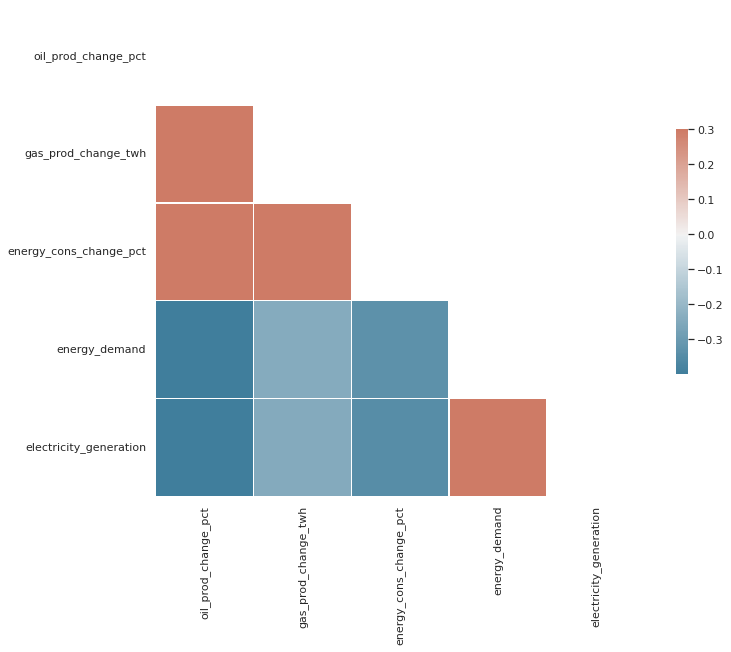

In [ ]:

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

***We are going to exclude "energy demand" from our dataset as a feature because it has a very strong correlation with energie generated and it will cause our model to be sensitive to data hence causing false poredictions.***

**Build the model**

***Step 1: Identify the ralationship between the electricity generated and other features.***

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

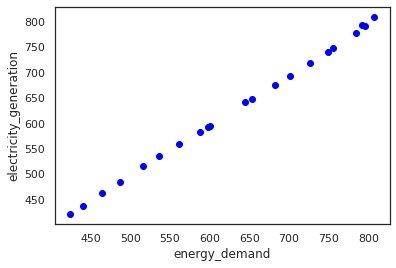

In [ ]:
plt.scatter(df.energy_demand, df.electricity_generation,  color='blue')
plt.xlabel("energy_demand")
plt.ylabel("electricity_generation")
plt.show()

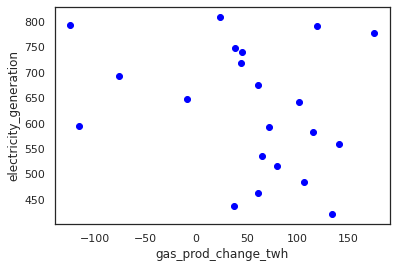

In [ ]:
plt.scatter(df.gas_prod_change_twh, df.electricity_generation,  color='blue')
plt.xlabel("gas_prod_change_twh")
plt.ylabel("electricity_generation")
plt.show()

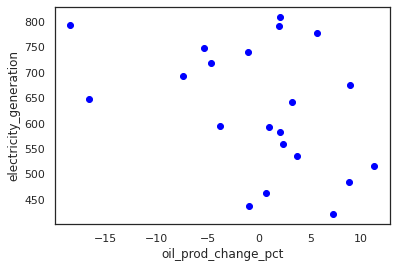

In [ ]:
plt.scatter(df.oil_prod_change_pct, df.electricity_generation,  color='blue')
plt.xlabel("oil_prod_change_pct")
plt.ylabel("electricity_generation")
plt.show()

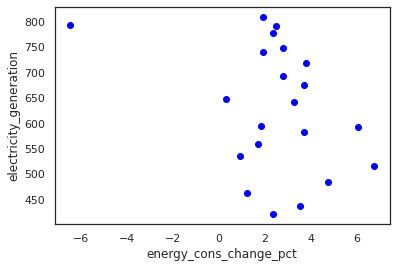

In [ ]:
plt.scatter(df.energy_cons_change_pct, df.electricity_generation,  color='blue')
plt.xlabel("energy_cons_change_pct")
plt.ylabel("electricity_generation")
plt.show()

The result from our graph shows a linear relationship of our target value with all the features. Models we will shows to predict our target value are **linear regression** and **DecisionTreeRegressor**

**1. Linear Regression**

**1. 1. Prediction**

In [ ]:
features = ["energy_cons_change_pct", "oil_prod_change_pct", "gas_prod_change_twh"]
X = df[features]
X.head()

,energy_cons_change_pct,oil_prod_change_pct,gas_prod_change_twh
0,2.345,7.284,134.287
1,3.507,-1.002,37.401
2,1.234,0.679,61.011
3,4.753,8.758,106.858
4,6.758,11.272,79.971


In [ ]:
y = df.electricity_generation
y.head()

0    420.45
1    437.19
2    462.24
3    485.15
4    515.29
Name: electricity_generation, dtype: float64

In [ ]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 42)

In [ ]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_prediction =  LR.predict(x_test)
y_prediction

array([590.70395914, 598.83957212, 643.30286262, 640.95444051,
       624.90434618])

In [ ]:
print(y_prediction[:9])
print(y_test[:9])

[590.70395914 598.83957212 643.30286262 640.95444051 624.90434618]
0     420.45
17    777.44
15    740.19
1     437.19
8     592.99
Name: electricity_generation, dtype: float64


**1. 2. Model Validation**

In [ ]:
from sklearn.metrics import mean_absolute_error
val_mae_regr = mean_absolute_error(y_test, y_prediction)

# uncomment following line to see the validation_mae
print(val_mae_regr)

136.28406221806753


Our Model is predicting with a mean_absolute_error of 136.2. We will compare this result with the next model DecisionTreeRegressor and choose the best 

**2. Decistion Tree Regressor**

**2. 1. Prediction**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

feature_columns = ["energy_cons_change_pct", "oil_prod_change_pct", "gas_prod_change_twh"]
X = df[feature_columns]

# Specify Model
DecisionTreeregressorModel = DecisionTreeRegressor()


In [ ]:
# split the datasets into train and test datasets
from sklearn.model_selection import train_test_split
Train_X, Val_X, Train_Y, Val_Y = train_test_split(X, y, test_size=.2, random_state=1)

In [ ]:
DecisionTreeregressorModel.fit(Train_X, Train_Y)

DecisionTreeRegressor()

In [ ]:
val_predictions = DecisionTreeregressorModel.predict(Val_X)

In [ ]:
print(val_predictions)
print(Val_Y)

[462.24 420.45 515.29 437.19 420.45]
15    740.19
10    641.00
3     485.15
18    791.02
17    777.44
Name: electricity_generation, dtype: float64


**2. 2. Model Validation**

In [ ]:
from sklearn.metrics import mean_absolute_error
val_mae = mean_absolute_error(Val_Y, val_predictions)

# uncomment following line to see the validation_mae
print(val_mae)

247.892


Our Second Model produces a mae of 247.8 which is more errors than our linear regression produced with this datasets.

**3. Model to use**

In [ ]:
LR

LinearRegression()

**4. Conlusion and Recommendation**

Electricity consumption will report an increase as time goes on, this can be attributed to reasons such as population growth or industrialization in South Africa. If this trend continues, S.A should be wary since there should be a constant supply of energy. We recommend that the government monitor these fields identified as they are contributing to the energy demand each year. The increase of productions in these areas will demand an increase of energy.


To accommodate the consumption, South Africa can fill the demand by heavily investing in the current energy resources, which are oil and gas. This model also helps plan materials and finances to meet electricity demand. Furthermore, this model will help reduce energy waste and only produce the amount of energy needed.

The validation showed that our two models could be trusted at specific points because of the significant error produced. The model should be combined with certain other variables to validate the outcome. The energy generated amount will still increase because of the increase of the population and the progress with technology. A wrong prediction of the amount to generate can lead to an overload of resources and a waste of financial resources. To produce less quantity also means the country will be experiencing power outages. It is essential to understand what is impacting it and how we can plan for the future to sustain the needs of everyone.
